# Customer Segmentation and Model Analysis

### Imports

#### Libraries

In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Dataset

In [47]:
path = '../dataset/customer_segmentation.csv'
df = pd.read_csv(path)

## Exploring and Cleaning Data

In [48]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [49]:
df.shape

(2240, 29)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [51]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

#### Replace the missing values in Income with the mean Income of our Data

In [52]:
df['Income'] = df['Income'].fillna(np.mean(df['Income']))

In [53]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [54]:
df.describe(include=object)

,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


In [55]:
categorical_cols = ['Education', 'Marital_Status'] 

for col in categorical_cols:
    print("Value Count For:")
    print(df[col].value_counts())
    print()

Value Count For:
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

Value Count For:
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64



#### Converting the Date from object to datetime object

In [56]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], dayfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Calculating Age for Customers

In [57]:
df['Age'] = 2025 - df['Year_Birth']
df['Age']

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

In [58]:
df['Totalchildren'] = df['Teenhome'] + df['Kidhome']
df['Totalchildren']

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: Totalchildren, Length: 2240, dtype: int64

In [59]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Totalchildren'],
      dtype='object')

In [60]:
spend_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds']

In [61]:
df['Total_Spending'] = df[spend_cols].sum(axis=1)
df['Total_Spending']

0       1617
1         27
2        776
3         53
4        422
        ... 
2235    1341
2236     444
2237    1241
2238     843
2239     172
Name: Total_Spending, Length: 2240, dtype: int64

In [62]:
df['Customer_Since'] = (pd.Timestamp('today') - df['Dt_Customer']).dt.days
df['Customer_Since']

0       4760
1       4210
2       4409
3       4236
4       4258
        ... 
2235    4478
2236    4116
2237    4252
2238    4253
2239    4719
Name: Customer_Since, Length: 2240, dtype: int64

#### Visualizing Data

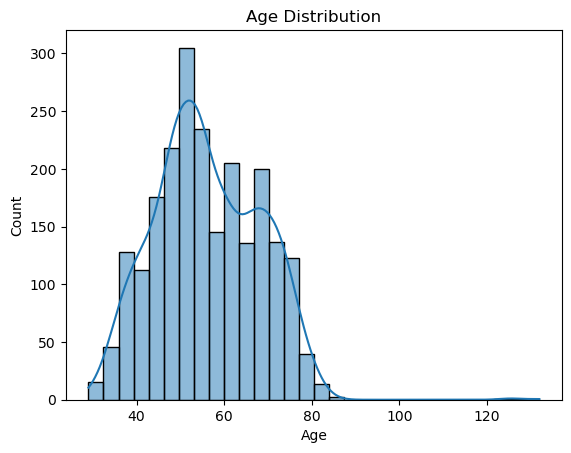

In [66]:
sns.histplot(df['Age'],bins=30,kde=True)
plt.title("Age Distribution")
plt.show()

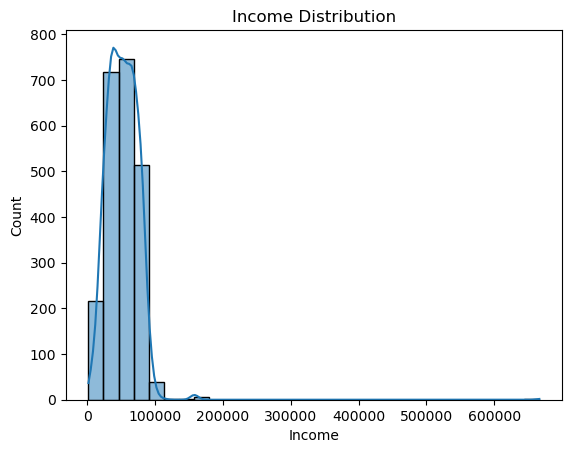

In [65]:
sns.histplot(df['Income'],bins=30,kde=True)
plt.title("Income Distribution")
plt.show()

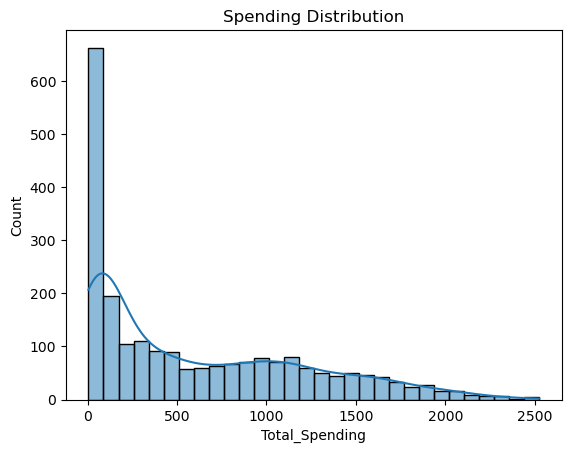

In [67]:
sns.histplot(df['Total_Spending'],bins=30,kde=True)
plt.title("Spending Distribution")
plt.show()

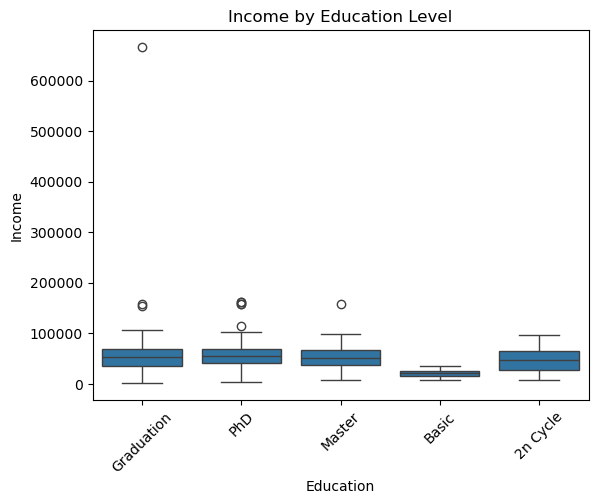

In [69]:
sns.boxplot(x='Education', y= 'Income', data=df)
plt.xticks(rotation=45)
plt.title('Income by Education Level')
plt.show()

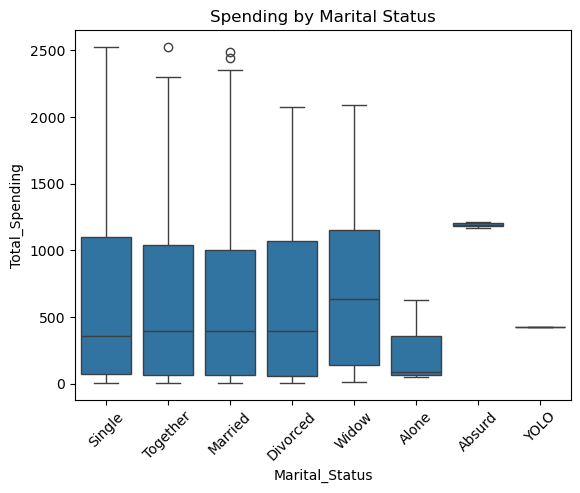

In [70]:
sns.boxplot(x='Marital_Status', y= 'Total_Spending', data=df)
plt.xticks(rotation=45)
plt.title('Spending by Marital Status')
plt.show()

In [71]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Totalchildren', 'Total_Spending', 'Customer_Since'],
      dtype='object')

In [79]:
corr = df[['Income', 'Age', 'Total_Spending', 'Recency', 'NumStorePurchases', 'NumWebPurchases']].corr()

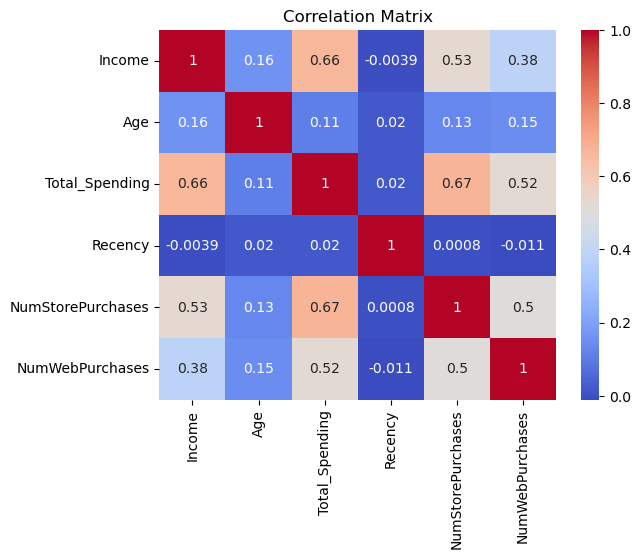

In [80]:
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()

## Applying Clustering to Dataset

### Imports

In [99]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

### Encoding Categorical Features

In [82]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

### Scale Numerical Features

In [113]:
numeric_cols = df_encoded.select_dtypes(include=['int64','float64']).columns
numeric_cols = numeric_cols.drop('ID', errors='ignore')

scaler = StandardScaler()

df_scaled = df_encoded.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

In [122]:
df_scaled

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Cluster
0,5524,-0.985345,0.235327,-0.825218,-0.929894,2012-09-04,0.307039,0.983781,1.551577,1.679702,...,False,False,False,False,False,True,False,False,False,2
1,2174,-1.235733,-0.235826,1.032559,0.906934,2014-03-08,-0.383664,-0.870479,-0.636301,-0.713225,...,False,False,False,False,False,True,False,False,False,1
2,4141,-0.317643,0.773633,-0.825218,-0.929894,2013-08-21,-0.798086,0.362723,0.570804,-0.177032,...,False,False,False,False,False,False,True,False,False,2
3,6182,1.268149,-1.022732,1.032559,-0.929894,2014-02-10,-0.798086,-0.870479,-0.560857,-0.651187,...,False,False,False,False,False,False,True,False,False,3
4,5324,1.017761,0.241519,1.032559,-0.929894,2014-01-19,1.550305,-0.389085,0.419916,-0.216914,...,False,True,False,False,True,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,-0.150717,0.358568,-0.825218,0.906934,2013-06-13,-0.107383,1.203678,0.419916,0.066692,...,False,False,False,False,True,False,False,False,False,0
2236,4001,-1.903435,0.470064,2.890335,0.906934,2014-06-10,0.237969,0.303291,-0.661449,-0.606873,...,False,True,False,False,False,False,True,False,False,2
2237,7270,1.017761,0.189106,-0.825218,-0.929894,2014-01-25,1.446700,1.795020,0.545656,0.221789,...,False,False,False,True,False,False,False,False,False,3
2238,8235,-1.068807,0.679035,-0.825218,0.906934,2014-01-24,-1.419719,0.368666,0.092992,0.208495,...,True,False,False,False,False,False,True,False,False,3


In [123]:
df_scaled.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Totalchildren', 'Total_Spending', 'Customer_Since', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Cluster'],
      dtype='object')

### Using K-Means For Clustering Data
Using Elbow Method to Decide Which k to pick First

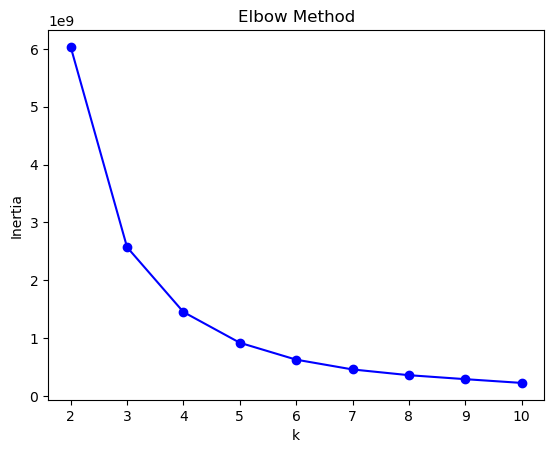

In [126]:
X = df_scaled.select_dtypes(include=['int64','float64'])

inertia = []
K = range(2, 11)

for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K, inertia, 'bo-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Since Elbow Method Shows very High Inertia in k Ranges [2:4] and much less Inertia in k Ranges [6:10], the best k will be 4 or 5 clusters

### Applying K-Means with the 2 options we got

In [115]:
kmeans4 = KMeans(n_clusters=4, random_state=42)
labels4 = kmeans4.fit_predict(X)

kmeans5 = KMeans(n_clusters=5, random_state=42)
labels5 = kmeans5.fit_predict(X)

### Comparing the 2 Options 

In [116]:
score4 = silhouette_score(X, labels4)
score5 = silhouette_score(X, labels5)

print("Silhouette Score for k=4:", score4)
print("Silhouette Score for k=5:", score5)

Silhouette Score for k=4: 0.5757997511593055
Silhouette Score for k=5: 0.5668037460638574


Higher Score for k=4, so k=4 is the better option

### Visualize Clusters

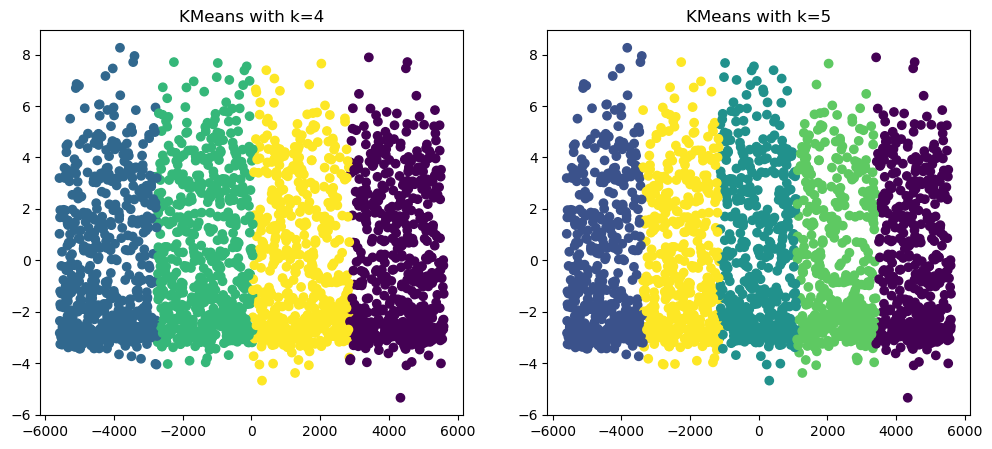

In [117]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels4, cmap='viridis')
plt.title("KMeans with k=4")

plt.subplot(1,2,2)
plt.scatter(reduced_data[:,0], reduced_data[:,1], c=labels5, cmap='viridis')
plt.title("KMeans with k=5")

plt.show()

### Assigning Clusters to Data
Since we picked k=4 now we should label the produced Clusters to the data

In [118]:
df_scaled['Cluster'] = labels4
df_scaled['Cluster'].value_counts()

Cluster
2    592
1    563
0    555
3    530
Name: count, dtype: int64

### Profile Clusters
average Age, Income, Spending, Recency, etc. for each cluster.

In [120]:
cluster_profile = df_scaled.groupby('Cluster').mean().drop(columns='ID')
cluster_profile

,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.005531,0.041474,-0.021855,0.033199,2013-06-28 19:50:55.135134976,-0.105392,-0.034617,0.026247,0.006617,-0.008499,...,0.545946,0.131532,0.212613,0.000000,0.099099,0.385586,0.203604,0.266667,0.043243,0.001802
1,0.016208,-0.024783,-0.006872,0.026039,2013-07-08 23:36:58.827708672,0.001130,-0.022489,-0.002642,-0.012152,0.054283,...,0.506217,0.165187,0.207815,0.003552,0.101243,0.396092,0.216696,0.246892,0.033748,0.001776
2,-0.010720,0.014819,-0.028131,-0.030097,2013-07-10 13:51:53.513513472,0.056951,0.070901,-0.010362,0.020208,0.028081,...,0.488176,0.175676,0.224662,0.000000,0.111486,0.361486,0.229730,0.271959,0.023649,0.000000
3,-0.011035,-0.033657,0.061608,-0.028809,2013-07-23 21:36:00.000000000,0.045549,-0.019057,-0.013105,-0.016592,-0.080129,...,0.471698,0.188679,0.222642,0.001887,0.101887,0.401887,0.205660,0.249057,0.037736,0.000000
